# Algorytm genetyczny
* Zastosowany rodzaj selekcji: ranking (w każdej kolejnej iteracji branych jest pod uwagę x najlepszych osobników z poprzedniej)
* Zastosowany rodzaj krzyżowania: OX (losowy fragment genów z jednego osobnika + węzły drugiego w kolejności ich występowania w jego genotypie)
* Zastosowana mutacja: swap (losowe przestawienie dwóch sąsiednich genów)

In [2]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display
from enum import Enum

In [3]:
def AnalyseGEN(plot_name, files, expected_results, iterations=10,
               populationSize=10, mutationProbability = 0.05, crossesPerGeneration=50,
                drawPlot = True):
    """
    Uruchamia osobny proces obliczający wynik działania algorytmu genetycznego na podstawie danych.
    Zwraca tablicę z wynikami pomiarów oraz obliczony błąd pomiaru wyrażony w [%].
    drawPlot = True rysuje dodatkowo wykres
    """
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("solving", f, end ="...")
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe",
             "GEN",
             "../Debug/Data/"+f+".txt",
             str(iterations),
             str(populationSize),
             str(mutationProbability),
             str(crossesPerGeneration),
             str(0)],
            stdout=subprocess.PIPE)
        
        text_result = p1.communicate()[0].strip()
        print("result", text_result, end ="...")
        single_result = float(text_result)
        actual_results.append(single_result)
        
        index+=1
        
    errors = [(abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100
                   for x in range(len(actual_results))]
    
    avgError = sum(errors) / len(errors)
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': errors
        })
    
    if drawPlot:
        plt.rcParams['figure.figsize'] = [20, 5]
        fig, axes = plt.subplots()

        ind = np.arange(len(expected_results))
        width = 0.4   

        plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
        plt.bar(ind + width, actual_results, width,
            label='Wartosci obliczone przez algorytm')

        plt.ylabel('Wagi scieżek')
        plt.title(plot_name)

        plt.xticks(ind + width / 2, files)
        plt.legend(loc='best')

        plt.show()
    
    print("avgErr", avgError)
    
    return (resultTable, avgError)

In [4]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

iterations_of_dependency_check = 40

In [5]:
class Parameter(Enum):
    POPULATION_SIZE = 1
    MUTATION_PROBABILITY = 2
    CROSSES_PER_GENERATION = 3

def parameterImpactAnalysis(multiplier = 1,
                            parameter = Parameter.POPULATION_SIZE,
                            iterations=2,
                            file=files[3],
                            expected_result=expected_results[3]):
    """
    Wyświetla wykres ilustrujący wpływ zmiany parametru na działanie algorytmu
    """
    avg_errs = []
    values_used = []
    for i in range(iterations):
        value_used = (i+1)*multiplier
        if(parameter == Parameter.POPULATION_SIZE):
            avg_errs.append(
                AnalyseGEN("Wpływ wielkości populacji na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=value_used,
                           drawPlot=False)[1])
        elif(parameter == Parameter.MUTATION_PROBABILITY):
            avg_errs.append(
                AnalyseGEN("Wpływ prawodopodobieństwa mutacji na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=50,
                           mutationProbability=value_used,
                           drawPlot=False)[1])
        elif(parameter == Parameter.CROSSES_PER_GENERATION):
            avg_errs.append(
                AnalyseGEN("Wpływ ilości potomstwa na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=50,
                           crossesPerGeneration=value_used,
                           drawPlot=False)[1])
        values_used.append(value_used)
        
    print(avg_errs)

    plot, ax = plt.subplots()
    ax.set_ylabel("Odchylenie od wartości opt. [%]")
    ax.set_xlabel("Wartość modyfikowanego parametru")
    #plot.plot(values_used, avg_errs)
    
    # trendline
    z = np.polyfit(values_used, avg_errs, 1)
    p = np.poly1d(z)
    
    plt.plot(values_used, avg_errs, values_used, p(values_used),"b--")
    plt.show()
    

## Zależność dokładności algorytmu od wielkości populacji

solving TSP/data24...result b'1743'...avgErr 37.028301886792455
solving TSP/data24...result b'1792'...avgErr 40.88050314465409
solving TSP/data24...result b'1401'...avgErr 10.141509433962264
solving TSP/data24...result b'1588'...avgErr 24.842767295597483
solving TSP/data24...result b'1631'...avgErr 28.223270440251575
solving TSP/data24...result b'1385'...avgErr 8.883647798742137
solving TSP/data24...result b'1701'...avgErr 33.72641509433962
solving TSP/data24...result b'1424'...avgErr 11.949685534591195
solving TSP/data24...result b'1467'...avgErr 15.330188679245282
solving TSP/data24...result b'1338'...avgErr 5.188679245283019
solving TSP/data24...result b'1440'...avgErr 13.20754716981132
solving TSP/data24...result b'1491'...avgErr 17.21698113207547
solving TSP/data24...result b'1442'...avgErr 13.364779874213836
solving TSP/data24...result b'1494'...avgErr 17.452830188679243
solving TSP/data24...result b'1397'...avgErr 9.827044025157234
solving TSP/data24...result b'1375'...avgErr 8.

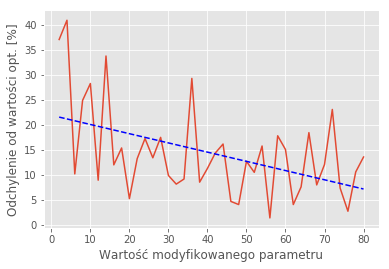

In [5]:
parameterImpactAnalysis(2,
                        Parameter.POPULATION_SIZE,
                        iterations=iterations_of_dependency_check,
                        # iterations=3,
                        file=files[2],
                        expected_result=expected_results[2])

## Zależność dokładności algorytmu od prawdopodobieństwa mutacji

solving TSP/data24...result b'1533'...avgErr 20.5188679245283
solving TSP/data24...result b'1391'...avgErr 9.355345911949685
solving TSP/data24...result b'1514'...avgErr 19.025157232704405
solving TSP/data24...result b'1440'...avgErr 13.20754716981132
solving TSP/data24...result b'1510'...avgErr 18.71069182389937
solving TSP/data24...result b'1527'...avgErr 20.047169811320757
solving TSP/data24...result b'1607'...avgErr 26.336477987421386
solving TSP/data24...result b'1501'...avgErr 18.00314465408805
solving TSP/data24...result b'1689'...avgErr 32.78301886792453
solving TSP/data24...result b'1562'...avgErr 22.79874213836478
solving TSP/data24...result b'1752'...avgErr 37.735849056603776
solving TSP/data24...result b'1769'...avgErr 39.07232704402516
solving TSP/data24...result b'1679'...avgErr 31.99685534591195
solving TSP/data24...result b'1947'...avgErr 53.06603773584906
solving TSP/data24...result b'1768'...avgErr 38.9937106918239
solving TSP/data24...result b'1920'...avgErr 50.94339

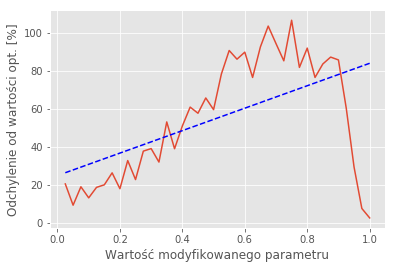

In [6]:
parameterImpactAnalysis(0.025,
                        Parameter.MUTATION_PROBABILITY,
                        iterations=iterations_of_dependency_check,
                        file=files[2],
                        expected_result=expected_results[2])

## Zależność dokładności algorytmu od ilości potomstwa każdej z generacji 

solving TSP/data24...result b'2113'...avgErr 66.11635220125787
solving TSP/data24...result b'2004'...avgErr 57.54716981132076
solving TSP/data24...result b'1895'...avgErr 48.977987421383645
solving TSP/data24...result b'1485'...avgErr 16.745283018867923
solving TSP/data24...result b'1389'...avgErr 9.19811320754717
solving TSP/data24...result b'1351'...avgErr 6.210691823899371
solving TSP/data24...result b'1563'...avgErr 22.87735849056604
solving TSP/data24...result b'1358'...avgErr 6.761006289308176
solving TSP/data24...result b'1319'...avgErr 3.6949685534591192
solving TSP/data24...result b'1462'...avgErr 14.937106918238992
solving TSP/data24...result b'1458'...avgErr 14.622641509433961
solving TSP/data24...result b'1475'...avgErr 15.959119496855346
solving TSP/data24...result b'1413'...avgErr 11.084905660377359
solving TSP/data24...result b'1506'...avgErr 18.39622641509434
solving TSP/data24...result b'1596'...avgErr 25.471698113207548
solving TSP/data24...result b'1294'...avgErr 1.7

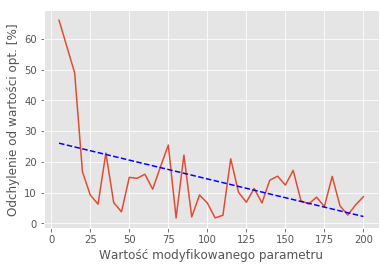

In [7]:
parameterImpactAnalysis(5,
                        Parameter.CROSSES_PER_GENERATION,
                        iterations=iterations_of_dependency_check,
                        file=files[2],
                        expected_result=expected_results[2])

## Porównanie wyników uzyskanych przez algorytm z wynikami optymalnymi dla przykładowych zestawów danych

solving TSP/data17...result b'2085'...solving TSP/data21...result b'2707'...solving TSP/data24...result b'1469'...solving TSP/data26...result b'1071'...solving TSP/data29...result b'1731'...solving TSP/data42...result b'966'...solving TSP/data58...result b'42758'...solving TSP/data120...result b'26289'...

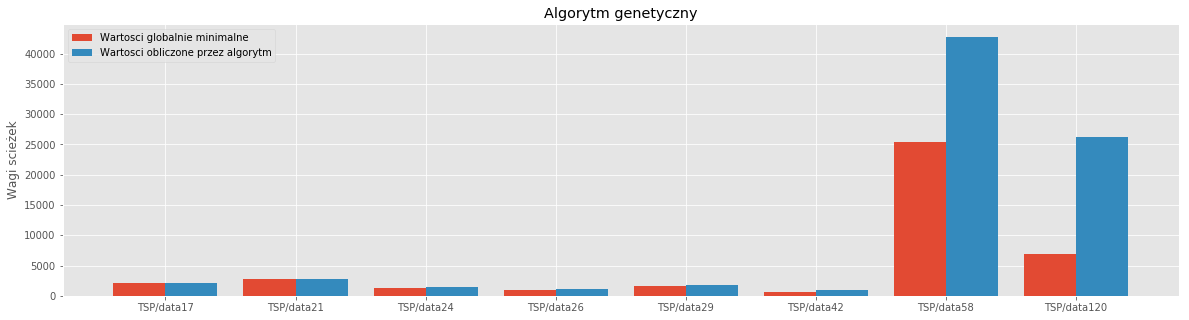

avgErr 52.820995257725784


,baseFile,actual_results,expected_results,error
0,TSP/data17,2085.0,2085,0.000000
1,TSP/data21,2707.0,2707,0.000000
2,TSP/data24,1469.0,1272,15.487421
3,TSP/data26,1071.0,937,14.300961
4,TSP/data29,1731.0,1610,7.515528
5,TSP/data42,966.0,699,38.197425
6,TSP/data58,42758.0,25395,68.371727
7,TSP/data120,26289.0,6942,278.694901


In [6]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, mutationProbability = 0.01, iterations=100, populationSize=100)[0])